In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import cluster, datasets, mixture
from scipy.stats import multivariate_normal
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_moons
from sklearn.datasets import make_blobs
from matplotlib import pyplot
sns.set_context("talk", font_scale=1.5)

In [2]:
X, y = make_blobs(n_samples=200,
                  centers=4, 
                  cluster_std=2,
                  random_state=2021)
data = pd.DataFrame(X)
data.columns=["col1","col2"]
data["cluster"]=y
data.head()

,col1,col2,cluster
0,12.359789,-2.098506,2
1,-8.360904,-3.252703,1
2,-10.051331,0.089062,1
3,-4.874019,-8.553263,1
4,12.555661,-4.074378,2


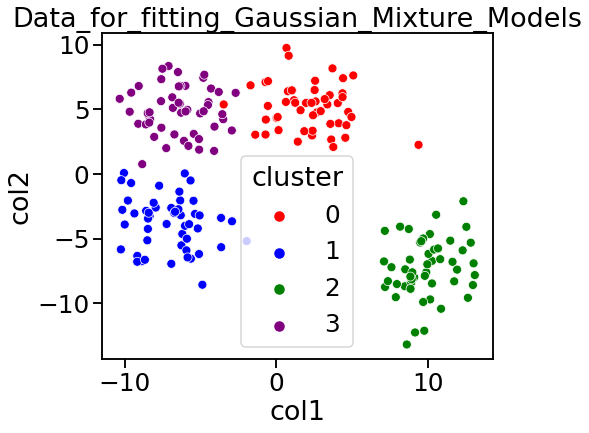

In [3]:
plt.figure(figsize=(7,6))
sns.scatterplot(data=data, 
                x="col1",
                y="col2", 
                hue="cluster",
                palette=["red","blue","green", "purple"])
plt.title("Data_for_fitting_Gaussian_Mixture_Models");

In [4]:
gmm = GaussianMixture(3, 
                     covariance_type='full', 
                     random_state=0).fit(data[["col1","col2"]])
gmm.means_

array([[ 9.9513139 , -7.27297126],
       [-6.96563855,  0.05199357],
       [ 1.08589402,  5.25399027]])

In [5]:
labels = gmm.predict(data[["col1","col2"]])

In [6]:
data[["predicted_cluster"]]=labels


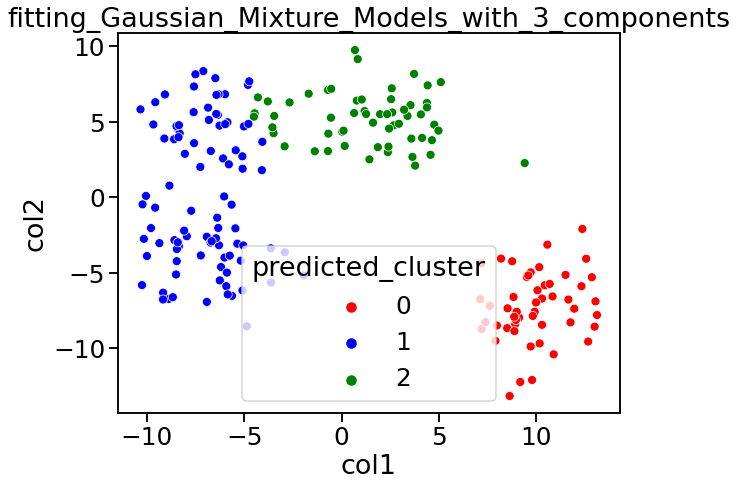

In [7]:
plt.figure(figsize=(9,7))
sns.scatterplot(data=data, 
                x="col1",
                y="col2", 
                hue="predicted_cluster",
                palette=["red","blue","green"])
plt.title("fitting_Gaussian_Mixture_Models_with_3_components");

In [8]:
n_components = np.arange(1, 21)
models = [GaussianMixture(n, 
                          covariance_type='full', random_state=0).fit(X) for n in n_components]
models[0:5]

[GaussianMixture(random_state=0),
 GaussianMixture(n_components=2, random_state=0),
 GaussianMixture(n_components=3, random_state=0),
 GaussianMixture(n_components=4, random_state=0),
 GaussianMixture(n_components=5, random_state=0)]

In [9]:
models[0].bic(X)

2619.533436143362

In [10]:
models[0].aic(X)

2603.0418493106217

In [11]:
gmm_model_comparisons=pd.DataFrame({"n_components" : n_components,
                                  "BIC" : [m.bic(X) for m in models],
                                   "AIC" : [m.aic(X) for m in models]})


In [12]:
gmm_model_comparisons.head()

,n_components,BIC,AIC
0,1,2619.533436,2603.041849
1,2,2432.884484,2396.602993
2,3,2344.286555,2288.215159
3,4,2324.928451,2249.067151
4,5,2351.458181,2255.806978


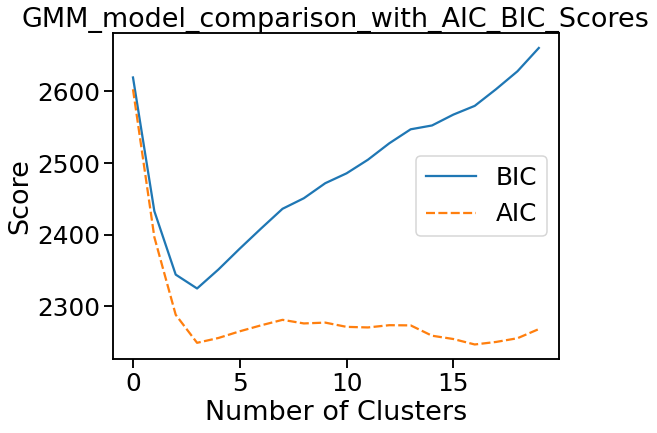

In [13]:
plt.figure(figsize=(8,6))
sns.lineplot(data=gmm_model_comparisons[["BIC","AIC"]])
plt.xlabel("Number of Clusters")
plt.ylabel("Score")
plt.title("GMM_model_comparison_with_AIC_BIC_Scores");

In [14]:
n=3
gmm = GaussianMixture(n, covariance_type='full', random_state=0).fit(data[["col1","col2"]])
labels = gmm.predict(data[["col1","col2"]])
data[["predicted_cluster"]]=labels

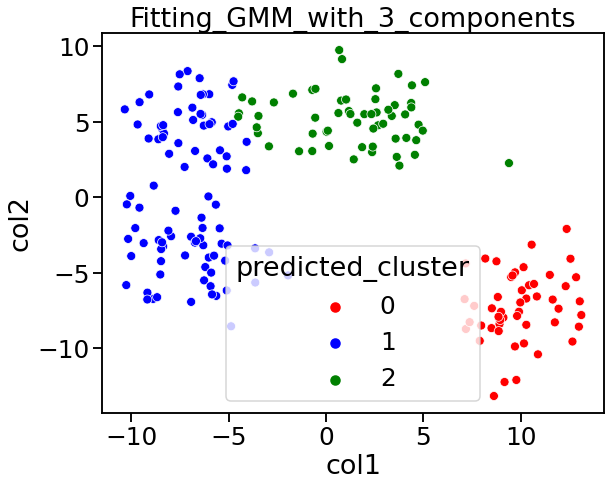

In [15]:
plt.figure(figsize=(9,7))
sns.scatterplot(data=data, 
                x="col1",
                y="col2", 
                hue="predicted_cluster",
                palette=["red","blue","green"])
plt.title("Fitting_GMM_with_3_components");